# Predicting Fraud using Synthetic Transaction Data generated using PaySim Simiulator

<b>Importing libraries, xgboost Implemented

In [338]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
from xgboost import plot_tree
import pickle
import requests
import json

<b>Import dataset from the csv file to a data frame

In [339]:
data_raw = pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [340]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_raw.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000,6362620.000
mean,243.397,179861.904,833883.104,855113.669,1100701.667,1224996.398,0.001,0.000
std,142.332,603858.231,2888242.673,2924048.503,3399180.113,3674128.942,0.036,0.002
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,156.000,13389.570,0.000,0.000,0.000,0.000,0.000,0.000
50%,239.000,74871.940,14208.000,0.000,132705.665,214661.440,0.000,0.000
75%,335.000,208721.478,107315.175,144258.410,943036.708,1111909.250,0.000,0.000
max,743.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,1.000,1.000


In [341]:
data_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [342]:
data_raw.loc[data_raw["isFlaggedFraud"]==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.080,C728984460,4953893.080,4953893.080,C639921569,0.000,0.000,1,1
3247297,250,TRANSFER,1343002.080,C1100582606,1343002.080,1343002.080,C1147517658,0.000,0.000,1,1
3760288,279,TRANSFER,536624.410,C1035541766,536624.410,536624.410,C1100697970,0.000,0.000,1,1
5563713,387,TRANSFER,4892193.090,C908544136,4892193.090,4892193.090,C891140444,0.000,0.000,1,1
5996407,425,TRANSFER,10000000.000,C689608084,19585040.370,19585040.370,C1392803603,0.000,0.000,1,1
5996409,425,TRANSFER,9585040.370,C452586515,19585040.370,19585040.370,C1109166882,0.000,0.000,1,1
6168499,554,TRANSFER,3576297.100,C193696150,3576297.100,3576297.100,C484597480,0.000,0.000,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.000,0.000,1,1
6266413,617,TRANSFER,2542664.270,C786455622,2542664.270,2542664.270,C661958277,0.000,0.000,1,1
6281482,646,TRANSFER,10000000.000,C19004745,10399045.080,10399045.080,C1806199534,0.000,0.000,1,1


Only 16 transactions marked as isFlaggedFraud and for all such transactions we have isFraud, hence the column is redundant, used in case of duplicate transfers

In [343]:
del data_raw['isFlaggedFraud']

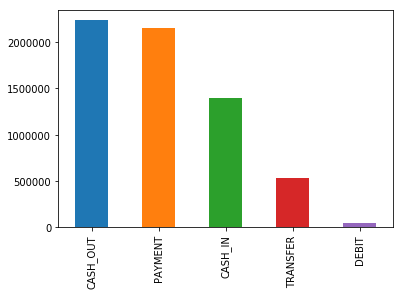

In [344]:
data_raw['type'].value_counts().plot('bar')

<i>Majority Transactions are transfer and cash out

In [345]:
data_raw.loc[data_raw.isFraud == 1].type.drop_duplicates().values

array(['TRANSFER', 'CASH_OUT'], dtype=object)

Fraud Transactions are in case of the tranfer and cash out which are also majority transactions

In [346]:
data_fraud_transfer = data_raw.loc[(data_raw.isFraud == 1) & (data_raw.type == 'TRANSFER')]
print("Fraud Transfers")
print(len(data_fraud_transfer))

Fraud Transfers
4097


In [347]:
data_fraud_cash_out = data_raw.loc[(data_raw.isFraud == 1) & (data_raw.type == 'CASH_OUT')]
print("Fraud Cash Outs")
print(len(data_fraud_cash_out))

Fraud Cash Outs
4116


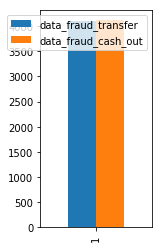

In [348]:
graph_df = data_fraud_transfer['isFraud'].value_counts().rename('data_fraud_transfer').to_frame()\
               .join(data_fraud_cash_out['isFraud'].value_counts().rename('data_fraud_cash_out').to_frame())

graph_df.plot(kind='bar',figsize=(2, 4))

Equal Distribution of Fraud Transactions within two types

All the frauds are for transfer and cash-out types, transfers can further lead to cash out, hence the destination of transfer type can match with origin of cash-out, <b>Inspect the same..!!!

In [349]:
print('For fraud transactions, are there destinations for TRANSFERS that are also origin for CASH_OUTs ?')
print((data_fraud_transfer.nameDest.isin(data_fraud_cash_out.nameOrig)).any())


For fraud transactions, are there destinations for TRANSFERS that are also origin for CASH_OUTs ?
False


result above shows below that no such common accounts among fraudulent transactions

## Data Cleaning, Concentrate on Transfers and Cash Outs 

In [350]:
data_clean = data_raw.loc[(data_raw.type == 'TRANSFER') | (data_raw.type == 'CASH_OUT')]

In [351]:
randomState = 5
np.random.seed(randomState)

In [352]:
target = data_clean['isFraud']
del data_clean['isFraud']

In [353]:
target.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [354]:
data_clean = data_clean.drop(['nameOrig', 'nameDest'], axis = 1)

In [355]:
data_clean.loc[data_clean.type == 'TRANSFER', 'type'] = 0
data_clean.loc[data_clean.type == 'CASH_OUT', 'type'] = 1
data_clean.type = data_clean.type.astype(int)

<b> For reference, Transfer classified as 0 and Cash Out as 1

In [356]:
data_clean.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.000,181.000,0.000,0.000,0.000
3,1,1,181.000,181.000,0.000,21182.000,0.000
15,1,1,229133.940,15325.000,0.000,5083.000,51513.440
19,1,0,215310.300,705.000,0.000,22425.000,0.000
24,1,0,311685.890,10835.000,0.000,6267.000,2719172.890


In [357]:
data_clean_fraud = data_clean.loc[target == 1]
data_clean_nonFraud = data_clean.loc[target == 0]
# len(data_clean.loc[target==1])
# len(data_clean.loc[target == 0])

<b>Identify Missing Values ratio in fraud transactions as compared to normal transactions

In [358]:
temp1 = len(data_clean_fraud.loc[(data_clean_fraud.oldbalanceDest == 0) &(data_clean_fraud.newbalanceDest == 0) & (data_clean_fraud.amount)])
ratio_fraud = temp1/len(data_clean_fraud)
print("ratio of transactions with destination balance having zero even after transaction in case of fraud")
print(ratio_fraud)

ratio of transactions with destination balance having zero even after transaction in case of fraud
0.4955558261293072


In [359]:
temp2 = len(data_clean_nonFraud.loc[(data_clean_nonFraud.oldbalanceDest == 0) &(data_clean_nonFraud.newbalanceDest == 0) & (data_clean_nonFraud.amount)])
ratio = temp2/len(data_clean_nonFraud)
print("ratio of transactions with destination balance having zero even after transaction in case of non fraud")
print(ratio)

ratio of transactions with destination balance having zero even after transaction in case of non fraud
0.0006176245277308345


<b>Hence it can be concluded that the issue is with fraud transactions where we have almost 50% such cases

In [360]:
data_clean.loc[(data_clean.oldbalanceDest == 0) & (data_clean.newbalanceDest == 0) & (data_clean.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

 replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

In [361]:
data_clean.loc[(data_clean.oldbalanceOrg == 0) & (data_clean.newbalanceOrig == 0) & (data_clean.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = np.nan

<b> check error in data integrity of money transfers

In [362]:
data_clean['diffBalOrg'] = data_clean.newbalanceOrig + data_clean.amount - data_clean.oldbalanceOrg
data_clean['diffBalDst'] = data_clean.oldbalanceDest + data_clean.amount - data_clean.newbalanceDest

In [363]:
data_clean.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffBalOrg,diffBalDst
count,2770409.000,2770409.000,2770409.000,1461843.000,1461843.000,2770409.000,2770409.000,1461843.000,2770409.000
mean,242.008,0.808,317536.141,90290.692,30496.543,1703551.160,2049734.435,243358.836,-28647.134
std,141.619,0.394,887789.658,340374.933,207167.892,4225550.491,4676990.062,633735.468,593479.436
min,1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-0.010,-75885725.630
25%,155.000,1.000,82973.540,10343.000,0.000,128073.450,327289.080,21278.095,0.000
50%,236.000,1.000,171260.930,29183.000,0.000,555709.970,828053.880,118016.080,0.000
75%,332.000,1.000,306791.180,88625.000,0.000,1735900.150,2122198.450,254619.430,0.000
max,743.000,1.000,92445516.640,59585040.370,49585040.370,356015889.350,356179278.920,57745572.180,10000000.000


In [364]:
limit = len(data_clean)


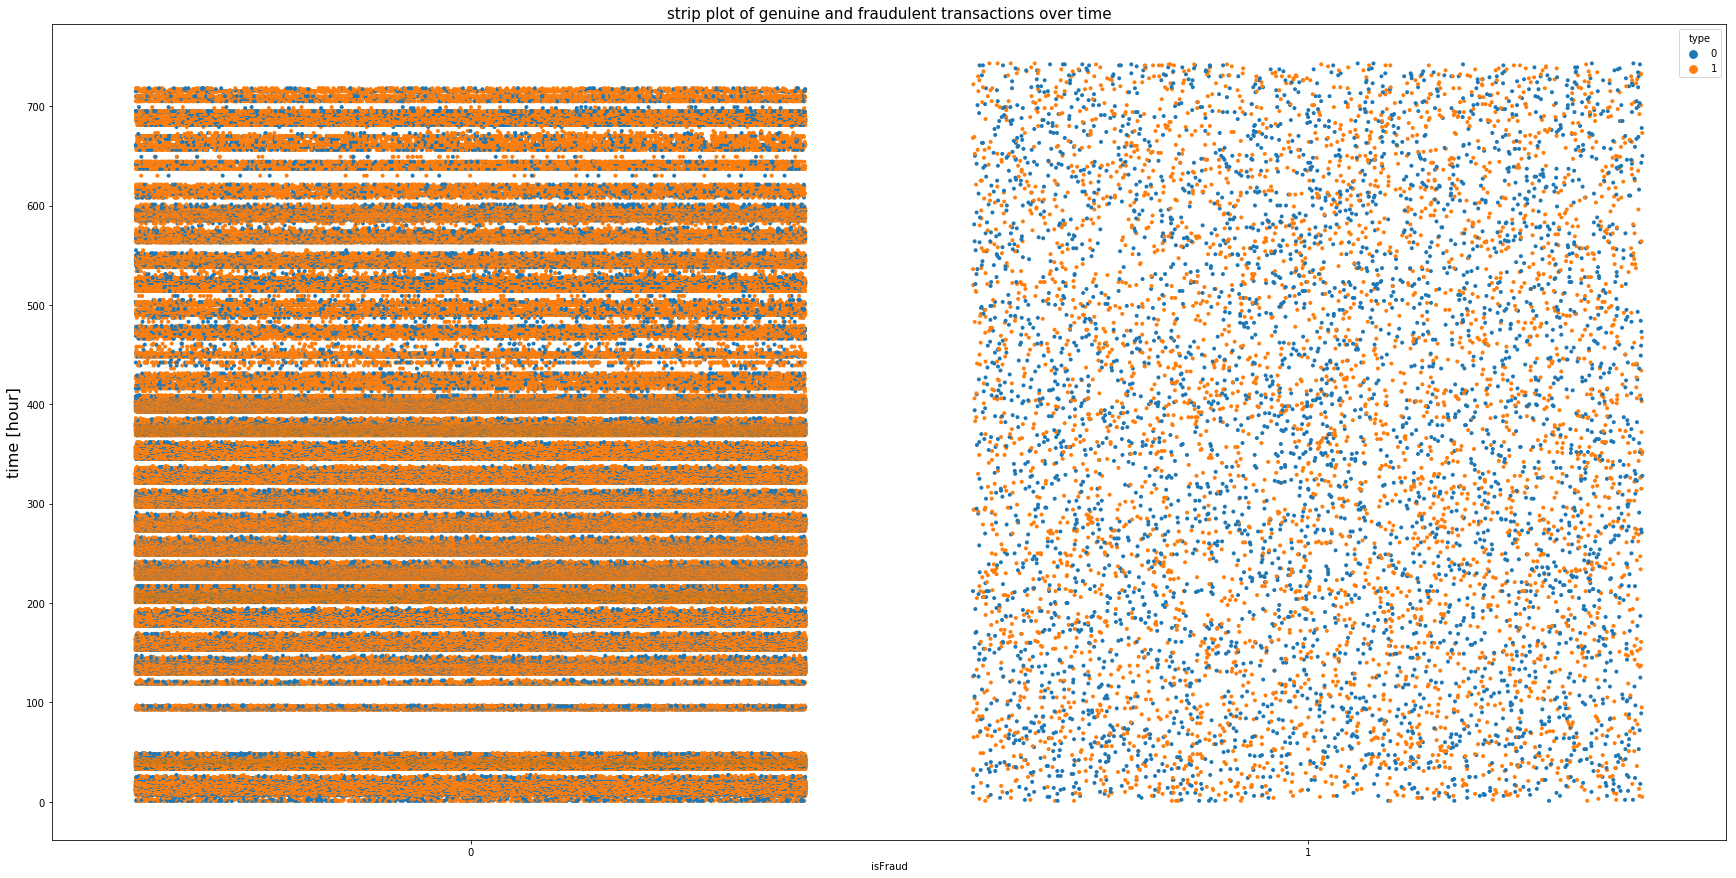

In [365]:
rcParams['figure.figsize'] = 30,15 
ax = sns.stripplot(x =target[:limit], y = data_clean.step[:limit], hue = data_clean.type[:limit], data= data_clean, jitter=0.4, size=4)
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('strip plot of genuine and fraudulent transactions over time', size = 15);


<i>Orange (Cash Out) and Blue (Transfer)

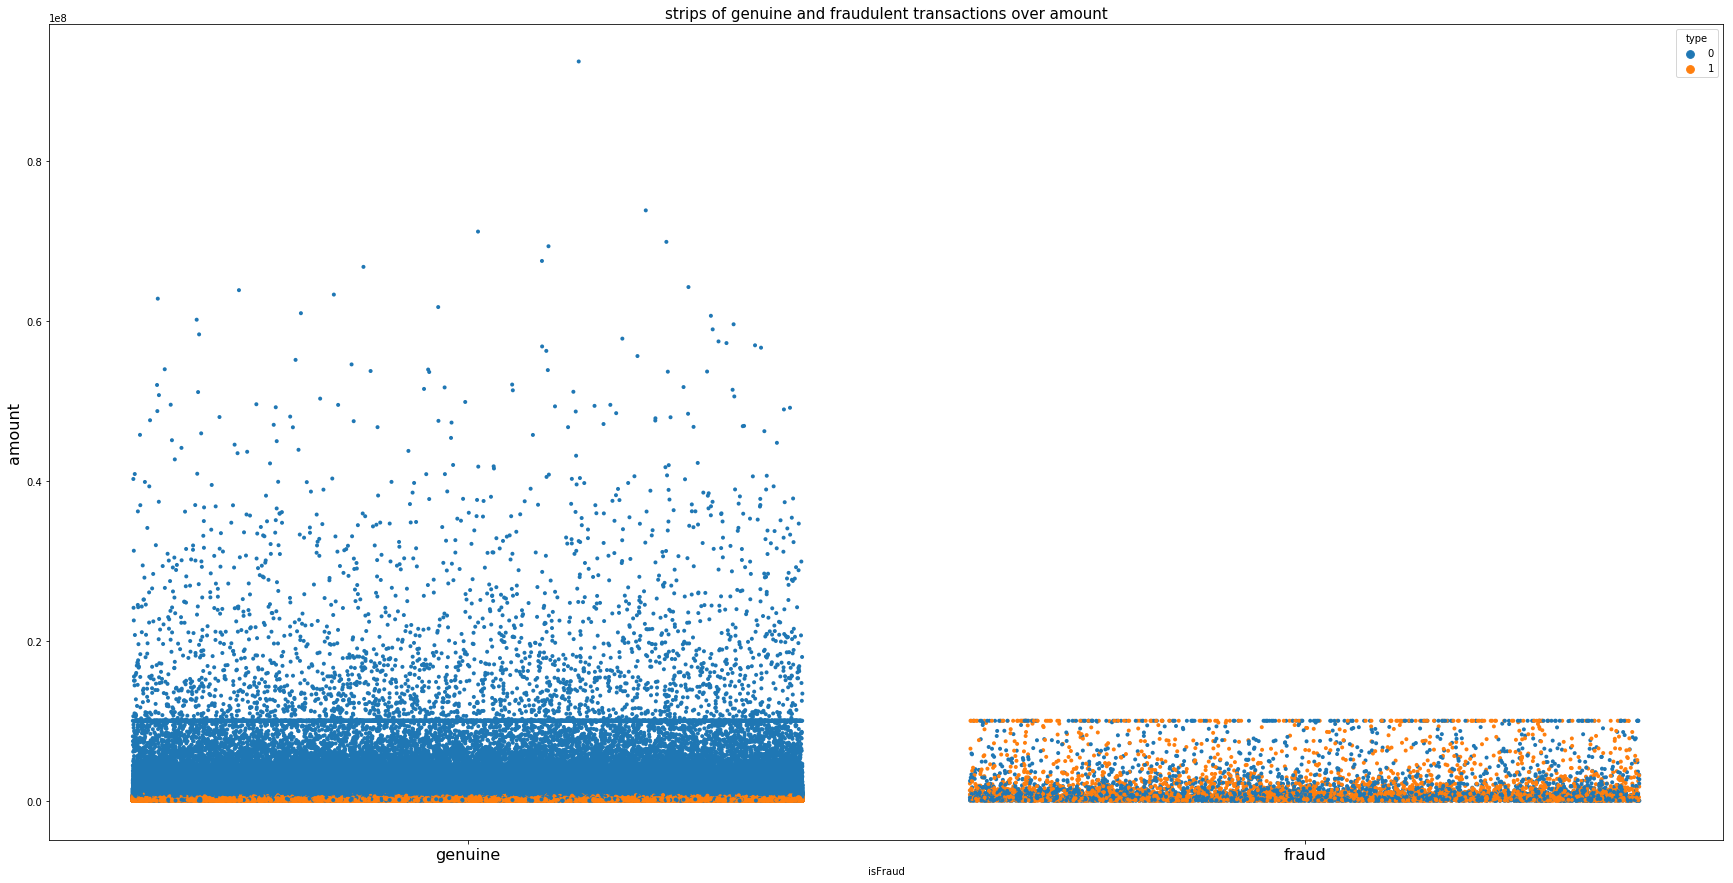

In [366]:
rcParams['figure.figsize'] = 30,15 
ax = sns.stripplot(x =target[:limit], y = data_clean.amount[:limit], hue = data_clean.type[:limit], data= data_clean, jitter=0.4, size=4)
ax.set_xticklabels(['genuine', 'fraud'], size = 16)
ax.set_ylabel('amount', size = 16)
ax.set_title('strips of genuine and fraudulent transactions over amount', size = 15);

<i>Orange (Cash Out) and Blue (Transfer)

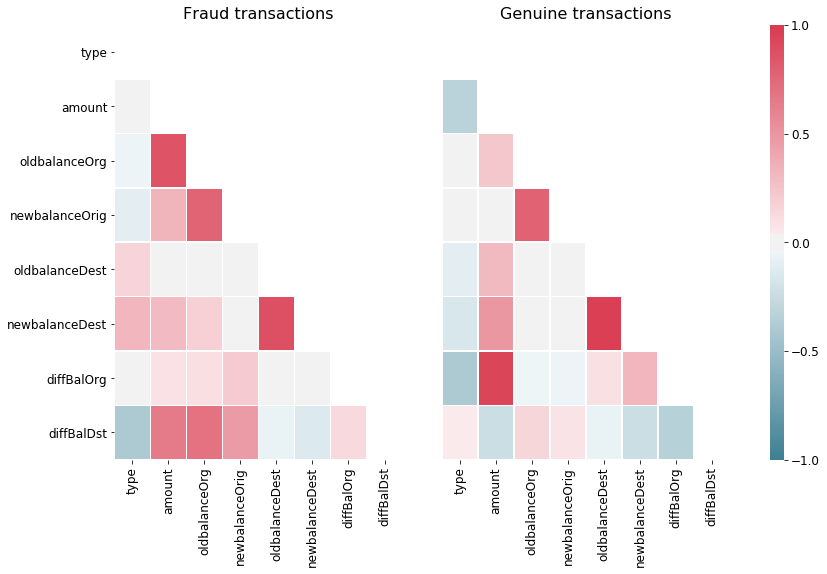

In [367]:
data_clean_fraud = data_clean.loc[target == 1] # update Xfraud & XnonFraud with cleaned data
data_clean_nonFraud = data_clean.loc[target == 0]

                  
corrFraud = data_clean_fraud.loc[:, data_clean.columns != 'step'].corr()
mask = np.zeros_like(corrFraud)
indices = np.triu_indices_from(corrFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.8, .8, .04), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (12, 8))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(corrFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 12); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 12); 
ax1.set_title('Fraud transactions', size = 16)

corrNonFraud = data_clean.loc[:, data_clean.columns != 'step'].corr()
ax2 = sns.heatmap(corrNonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 12); 
ax2.set_title('Genuine transactions', size = 16);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 12);

<i>Heatmaps depicting Correlations

In [368]:
print("Skewness in dataset")
print(len(data_clean_fraud) / float(len(data_clean))) 

Skewness in dataset
0.002964544224336551


In [369]:
x_train, x_test, y_train, y_test = train_test_split(data_clean, target, test_size = 0.2, random_state = randomState)

In [370]:
w = (target ==0).sum()/(target ==1).sum()

model = XGBClassifier(max_depth = 3, scale_pos_weight = w, n_jobs = 4)
# probabilities = clf.fit(trainX, trainY).predict_proba(testX)
# print('AUPRC = {}'.format(average_precision_score(testY, \
#                                               probabilities[:, 1])))

In [371]:
model_fit = model.fit(x_train, y_train)

In [372]:
estimator = model.n_estimators

In [373]:
model_score = model_fit.predict_proba(x_test)

In [374]:
average_precision_score(y_test, model_score[:,1])

0.9986361116985445

In [375]:
from xgboost import plot_tree
from graphviz import Digraph
from matplotlib.pylab import rcParams

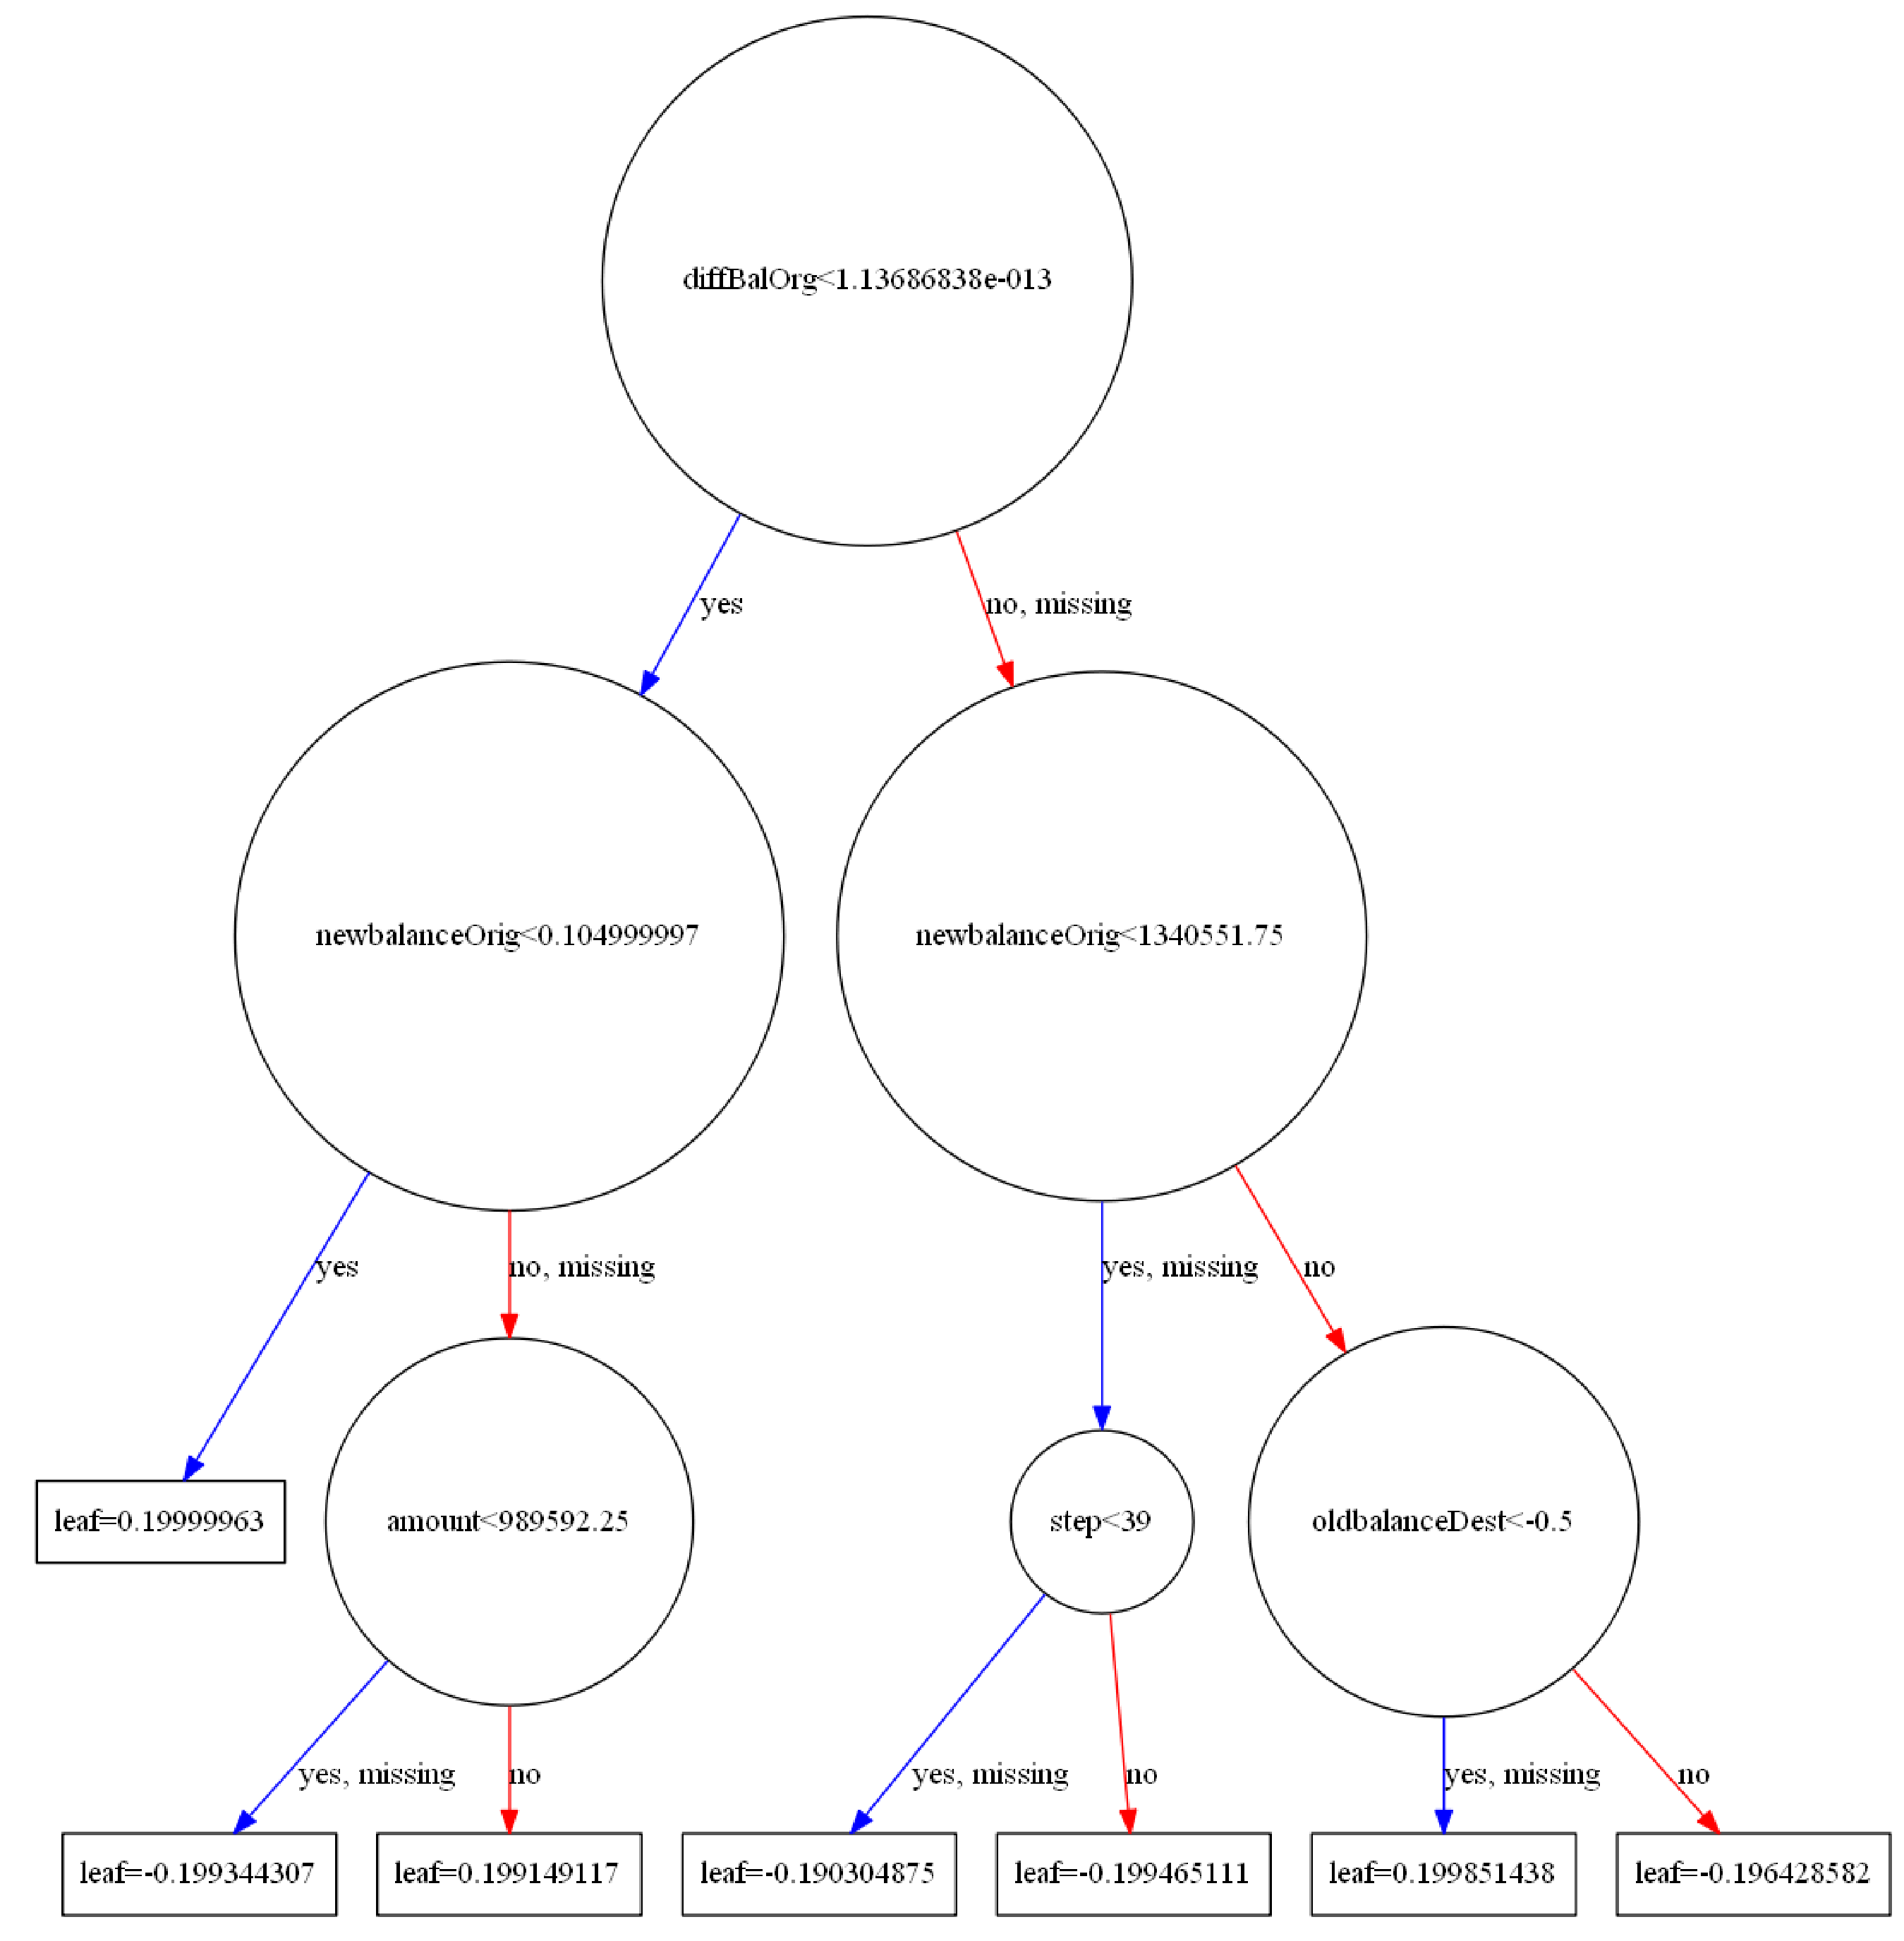

In [376]:
rcParams['figure.figsize'] = 80,50
plot_tree(model)

In [377]:
pickle.dump(model, open('model_aml.pkl','wb'))

In [378]:
#x_test.head()

In [379]:
test_value = data_raw.loc[data_raw.index==2736446]

In [380]:
value = data_clean.loc[data_clean.index==2736446]

In [381]:
test_value

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2736446,212,TRANSFER,4953893.080,C728984460,4953893.080,4953893.080,C639921569,0.000,0.000,1


In [382]:
value

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffBalOrg,diffBalDst
2736446,212,0,4953893.080,4953893.080,4953893.080,-1.000,-1.000,4953893.080,4953893.080


In [383]:
print(model.predict(value))

[1]
